## 1. Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Housing.csv")
m = len(data)
print("The number of data in the set:",m)

The number of data in the set: 545


In [2]:
data.head(10)

,Price,Square
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
5,10850000,7500
6,10150000,8580
7,10150000,16200
8,9870000,8100
9,9800000,5750


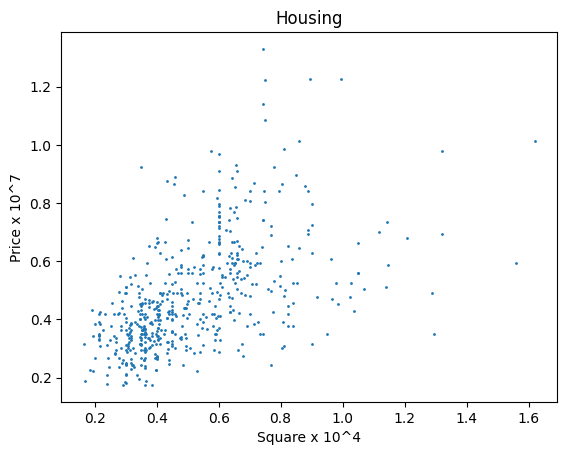

In [3]:
price = data['Price'] / 10000000
square = data['Square'] / 10000

plt.scatter(square, price, s=1)
plt.title("Housing")
plt.xlabel("Square x 10^4")
plt.ylabel("Price x 10^7")
plt.show()

## 2. Feature scaling with Standardization

In [4]:
# def standardization(data):
#     mean_val = np.mean(data)
#     std_dev = np.std(data)
#     standardized_data = [(x - mean_val) / std_dev for x in data]
#     return standardized_data

# # Example usage:
# square_standardized = standardization(square)
# price_standardized = standardization(price)

## 3. Gradient descent algorithm 

### 3.1 Linear Regression
$f_{w,b}({x^{(i)}})=w{x^{(i)}}+b$

In [5]:
def Predicting_Function(w, b, x):
    y = w * x + b
    return y

### 3.2 The gradient

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

#### Parameters Updated simultaneously

$$\begin{aligned}
&tmp\_{w}=w-\alpha\frac{\partial}{\partial w}J(w,b) \\
&tmp\_{b}=b-\alpha\frac{\partial}{\partial b}J(w,b) \\
&w = tmp\_{w} \\
&b = tmp\_{b} \\
\end{aligned}$$

In [6]:
def Gradient_Computing(square, price, w, b):
    m = len(square)
    Gradient_w = 0
    Gradient_b = 0
    for i in range(m):
        Gradient_w += (Predicting_Function(w, b, square[i]) - price[i]) * square[i]
        Gradient_b += (Predicting_Function(w, b, square[i]) - price[i])
    Gradient_w /= m
    Gradient_b /= m
    return Gradient_w, Gradient_b

### 3.3 Cost Function

$$J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}\bigl(f_{w,b}\bigl(x^{(i)}\bigr)-y^{(i)}\bigr)^{2}$$

$$\text{m = number of training examples}$$

$$\text{Best parameters w, b can minimize }J(w,b)$$

In [7]:
def Cost(w, b, x, y):
    m = len(x)
    J_w_b = 0
    for i in range(m):
        J_w_b += (Predicting_Function(w, b, x[i]) - y[i])**2
    J_w_b /= (2 * m)
    return J_w_b

### 3.4 Gradient Descent

*Gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}   \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [8]:
def Gradient_Descent(alpha, w, b, square, price, iterations):
    m = len(square)
    J_w_b = Cost(w, b, square, price)
    for i in range(iterations):
        if i % 100 == 0:  # Print every 100 iterations
            print("Iteration:", i, "w =", w, "b =", b, "J_w_b =", J_w_b)
        Gradient_w, Gradient_b = Gradient_Computing(square, price, w, b)
        temp_w = w - alpha * Gradient_w
        temp_b = b - alpha * Gradient_b
        w = temp_w
        b = temp_b
        J_w_b = Cost(w, b, square, price)
        
    print("Iteration:", i, "w =", w, "b =", b, "J_w_b =", J_w_b)
    return w, b, J_w_b

In [9]:
# Initialization
alpha = 0.01
w = 0 
b = 0
iterations = 10000

# Invoke Gradient Descent Algorithm, and get best parameters.
w, b, J_w_b = Gradient_Descent(alpha, w, b, square, price, iterations)

print("Best parameters w, b =",w ,b)
print("J(w,b)=", J_w_b)

Iteration: 0 w = 0 b = 0 J_w_b = 0.13106916364659238
Iteration: 100 w = 0.1554549962774025 b = 0.2680723194271046 J_w_b = 0.0229129946131505
Iteration: 200 w = 0.20498225154052496 b = 0.3388803652914768 J_w_b = 0.014515579757237437
Iteration: 300 w = 0.2249306609297837 b = 0.35516570379644447 J_w_b = 0.013781009674313073
Iteration: 400 w = 0.23645948836573438 b = 0.35646725232744814 J_w_b = 0.013640926723793863
Iteration: 500 w = 0.24543860540691864 b = 0.35373404466022373 J_w_b = 0.013552417102385058
Iteration: 600 w = 0.2535019950012891 b = 0.3499950675303222 J_w_b = 0.013473392212404407
Iteration: 700 w = 0.2611098947843503 b = 0.34608538321801435 J_w_b = 0.013400229163026458
Iteration: 800 w = 0.268397107525542 b = 0.3422324216616286 J_w_b = 0.013332285019920984
Iteration: 900 w = 0.275408016998959 b = 0.33849542285011136 J_w_b = 0.013269171479653733
Iteration: 1000 w = 0.28216170358223663 b = 0.3348871696561456 J_w_b = 0.013210543872193727
Iteration: 1100 w = 0.28866999233708385 b

Iteration: 9000 w = 0.4525551686726569 b = 0.24376817804248274 J_w_b = 0.012446409796180037
Iteration: 9100 w = 0.4528960936897972 b = 0.24358586362884932 J_w_b = 0.012446260338390724
Iteration: 9200 w = 0.45322467972040603 b = 0.24341014766056673 J_w_b = 0.012446121503378066
Iteration: 9300 w = 0.45354137334534655 b = 0.24324079132228207 J_w_b = 0.012445992536123648
Iteration: 9400 w = 0.4538466049825295 b = 0.2430775644420075 J_w_b = 0.01244587273527226
Iteration: 9500 w = 0.45414078947189146 b = 0.24292024517829405 J_w_b = 0.012445761449317938
Iteration: 9600 w = 0.45442432663920407 b = 0.24276861971872682 J_w_b = 0.012445658073060657
Iteration: 9700 w = 0.45469760183947777 b = 0.242622481989333 J_w_b = 0.012445562044315336
Iteration: 9800 w = 0.45496098648069555 b = 0.24248163337450715 J_w_b = 0.012445472840854357
Iteration: 9900 w = 0.4552148385285944 b = 0.24234588244707297 J_w_b = 0.012445389977567748
Iteration: 9999 w = 0.45545950299317567 b = 0.24221504470811434 J_w_b = 0.0124

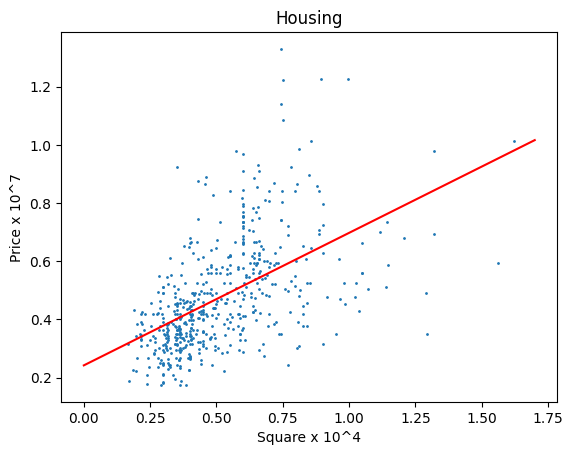

In [10]:
price = data['Price'] / 10000000
square = data['Square'] / 10000

x = np.arange(0, 1.8, 0.1)
y = Predicting_Function(w, b, x)

plt.scatter(square, price, s=1)
plt.plot(x, y, color = "r")
plt.title("Housing")
plt.xlabel("Square x 10^4")
plt.ylabel("Price x 10^7")
plt.show()

In [11]:
# Artificial data
square = [1, 2, 3, 4, 5]
price = [2, 4, 5, 4, 5]

alpha = 0.01
w = 0 
b = 0
iterations = 10000

w, b, J_w_b = Gradient_Descent(alpha, w, b, square, price, iterations)

print("Outcome:",w ,b ,J_w_b)

Iteration: 0 w = 0 b = 0 J_w_b = 8.6
Iteration: 100 w = 1.0417530517794173 b = 0.6051164658853391 J_w_b = 0.4714944115717107
Iteration: 200 w = 0.9729963053179606 b = 0.8533649866648746 J_w_b = 0.4050376166073046
Iteration: 300 w = 0.9149384936846535 b = 1.0629721083554924 J_w_b = 0.35765906019687305
Iteration: 400 w = 0.8659175262241602 b = 1.2399533551566193 J_w_b = 0.3238818127103192
Iteration: 500 w = 0.8245267954573398 b = 1.3893870264325945 J_w_b = 0.2998012468550727
Iteration: 600 w = 0.7895786358806834 b = 1.5155609714953076 J_w_b = 0.28263366527105827
Iteration: 700 w = 0.760070245108938 b = 1.6220956251429983 J_w_b = 0.27039450697156253
Iteration: 800 w = 0.7351549094664954 b = 1.712047892405405 J_w_b = 0.2616689334161354
Iteration: 900 w = 0.7141177083877446 b = 1.7879988633674513 J_w_b = 0.2554482741184853
Iteration: 1000 w = 0.6963550004885218 b = 1.8521278749603411 J_w_b = 0.25101342501067236
Iteration: 1100 w = 0.6813571026820594 b = 1.9062750448488748 J_w_b = 0.24785172

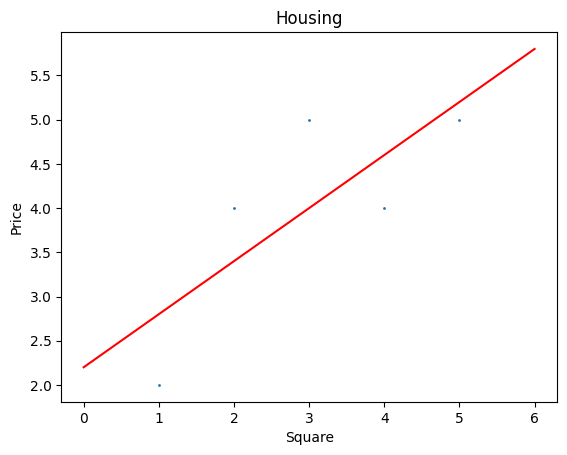

In [12]:
x = np.arange(0, 7, 1)
y = Predicting_Function(w, b, x)

plt.scatter(square, price, s=1)
plt.plot(x, y, color = "r")
plt.title("Housing")
plt.xlabel("Square")
plt.ylabel("Price")
plt.show()

# Data REFERENCE

[1]https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction